In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use(hep.style.CMS)
import itertools
from itertools import permutations
from itertools import combinations
from ROOT import *
import uproot3
import awkward as ak
import vector

Welcome to JupyROOT 6.26/06


In [2]:
arrays1 = (uproot3.open("/Users/arleeshelby/NuGun_200PU_extended_notrunc_0607.root")["L1TrackNtuple/eventTree"].arrays("*", namedecode="utf-8"))

In [3]:
arrays1.keys()

dict_keys(['trk_pt', 'trk_eta', 'trk_phi', 'trk_d0', 'trk_z0', 'trk_chi2', 'trk_chi2rphi', 'trk_chi2rz', 'trk_bendchi2', 'trk_nstub', 'trk_lhits', 'trk_dhits', 'trk_seed', 'trk_hitpattern', 'trk_lhits_hitpattern', 'trk_dhits_hitpattern', 'trk_nPSstub_hitpattern', 'trk_n2Sstub_hitpattern', 'trk_nLostPSstub_hitpattern', 'trk_nLost2Sstub_hitpattern', 'trk_nLoststub_V1_hitpattern', 'trk_nLoststub_V2_hitpattern', 'trk_phiSector', 'trk_etaSector', 'trk_genuine', 'trk_loose', 'trk_unknown', 'trk_combinatoric', 'trk_fake', 'trk_MVA1', 'trk_matchtp_pdgid', 'trk_matchtp_pt', 'trk_matchtp_eta', 'trk_matchtp_phi', 'trk_matchtp_z0', 'trk_matchtp_dxy', 'trk_matchtp_d0', 'trk_matchtp_z0_prod', 'trk_parent_matchtp_pdgid', 'trk_parent_matchtp_m', 'trk_parent_matchtp_m_calc', 'tp_pt', 'tp_eta', 'tp_phi', 'tp_dxy', 'tp_d0', 'tp_z0', 'tp_d0_prod', 'tp_z0_prod', 'tp_pdgid', 'tp_nmatch', 'tp_nstub', 'tp_eventid', 'tp_charge', 'parent_tp_pdgid', 'parent_tp_m', 'parent_tp_m_calc', 'matchtrk_pt', 'matchtrk_eta

In [4]:
mass_pi = 0.13957039

In [5]:
mass_array = []
for i in range(len(arrays1['tp_pt'])):
    mass_array.append([mass_pi]*len(arrays1['tp_pt'][i]))

In [305]:
mass_array_reco = []
for i in range(len(arrays1['trk_pt'])):
    mass_array_reco.append([mass_pi]*len(arrays1['trk_pt'][i]))

In [229]:
other_parameters = []
for i in range(len(arrays1['matchtrk_z0'])):
    other_parameters.append(np.dstack((arrays1['matchtrk_z0'][i],arrays1['matchtrk_d0'][i]))[0])

In [7]:
mass_array_reconstructed = []
for i in range(len(arrays1['matchtrk_pt'])):
    mass_array_reconstructed.append([mass_pi]*len(arrays1['matchtrk_pt'][i]))

In [8]:
reconstructed_data = vector.zip({'pt':arrays1['matchtrk_pt'], 'eta':arrays1['matchtrk_eta'], 'phi':arrays1['matchtrk_phi'],'mass':mass_array_reconstructed})

In [306]:
reconstructed_vector = vector.zip({'pt':arrays1['trk_pt'], 'eta':arrays1['trk_eta'], 'phi':arrays1['trk_phi'],'mass':mass_array_reco})

In [9]:
parent_ID = arrays1['parent_tp_pdgid']
daughter_ID = arrays1['tp_pdgid']
daughter_pt = arrays1['tp_pt']
daughter_phi = arrays1['tp_phi']
daughter_eta = arrays1['tp_eta']

In [10]:
daughter_ID_1 = arrays1['trk_matchtp_pdgid']
daughter_pt_1 = arrays1['tp_pt']
daughter_phi_1 = arrays1['tp_phi']
daughter_eta_1 = arrays1['tp_eta']

In [11]:
daughter_information_2 = []
for i in range(len(arrays1['tp_charge'])):
    daughter_information_2.append(np.dstack((arrays1['parent_tp_pdgid'][i],arrays1['tp_pdgid'][i],arrays1['tp_pt'][i],arrays1['tp_phi'][i],arrays1['tp_eta'][i],arrays1['parent_tp_m_calc'][i],mass_array[i]))[0])

In [12]:
match_track_array = []
for i in range(len(arrays1['matchtrk_pt'])):
    match_track_array.append([arrays1['matchtrk_pt'][i][j]>0 for j in range(len(arrays1['matchtrk_pt'][i]))])

In [13]:
K_long_mesons_mask = []
for i in range(len(parent_ID)):
    K_long_mesons_mask.append([np.abs(parent_ID[i][j])==310 for j in range(len(parent_ID[i]))])

In [14]:
parent_ID_reco = [parent_ID[i][match_track_array[i]] for i in range(9000)]

In [15]:
daughter_ID_reco = [daughter_ID[i][match_track_array[i]] for i in range(9000)]

In [241]:
len(reconstructed_data)

9000

In [17]:
K_long_mask_reco = []
for i in range(len(parent_ID_reco)):
    K_long_mask_reco.append([np.abs(parent_ID_reco[i][j])==310 for j in range(len(parent_ID_reco[i]))])

In [18]:
daughter_K_reco = [daughter_ID_reco[i][K_long_mask_reco[i]] for i in range(len(daughter_ID_reco))]

In [19]:
momentum_vector = vector.zip({'pt':arrays1['tp_pt'], 'eta':arrays1['tp_eta'], 'phi':arrays1['tp_phi'],'mass':mass_array})

In [249]:
# pram_K_parents = [other_parameters[i][K_long_mask_reco[i]] for i in range(9000)]

In [21]:
K_long_parents = [daughter_information_2[i][K_long_mesons_mask[i]] for i in range(9000)]

In [22]:
one_K = []

for i in range(9000):
    one_K.append(len(K_long_parents[i])==2)

In [23]:
len(one_K)

9000

In [24]:
momentum_parent_sorted = [momentum_vector[i][K_long_mesons_mask[i]] for i in range(9000)]

In [25]:
reconstructed_momentum_sorted = [reconstructed_data[i][K_long_mesons_mask[i]] for i in range(9000)]

In [250]:
reconstructed_other_parameters_sorted = [other_parameters[i][K_long_mesons_mask[i]] for i in range(9000)]

In [26]:
reconstructed_match = [reconstructed_data[i][match_track_array[i]] for i in range(9000)]

In [257]:
reconstructed_match_other_parameters = [other_parameters[i][match_track_array[i]] for i in range(9000)]

In [27]:
truth_reco_match = [momentum_vector[i][match_track_array[i]] for i in range(9000)]

In [28]:
reco_match_sorted = [reconstructed_match[i][K_long_mask_reco[i]] for i in range(len(reconstructed_match))]

In [258]:
reco_match_sorted_parameters = [reconstructed_match_other_parameters[i][K_long_mask_reco[i]] for i in range(len(reconstructed_match_other_parameters))]

In [29]:
truth_reco_sorted = [truth_reco_match[i][K_long_mask_reco[i]] for i in range(len(reconstructed_match))]

In [30]:
phi_mesons_mask = []
for i in range(len(K_long_parents)):
    phi_mesons_mask.append([np.abs(K_long_parents[i][j][1])==211 for j in range(len(K_long_parents[i]))])

In [31]:
phi_pos_match = []
for i in range(len(daughter_K_reco)):
    phi_pos_match.append([daughter_K_reco[i][j]==211 for j in range(len(daughter_K_reco[i]))])

In [32]:
phi_neg_match = []
for i in range(len(daughter_K_reco)):
    phi_neg_match.append([daughter_K_reco[i][j]==-211 for j in range(len(daughter_K_reco[i]))])

In [33]:
reco_match_pos = [reco_match_sorted[i][phi_pos_match[i]] for i in range(len(phi_pos_match))]

In [34]:
truth_match_pos = [truth_reco_sorted[i][phi_pos_match[i]] for i in range(len(phi_pos_match))]

In [35]:
reco_match_neg = [reco_match_sorted[i][phi_neg_match[i]] for i in range(len(phi_neg_match))]

In [259]:
reco_match_pos_parameters = [reco_match_sorted_parameters[i][phi_pos_match[i]] for i in range(len(phi_pos_match))]

In [260]:
reco_match_neg_parameters = [reco_match_sorted_parameters[i][phi_neg_match[i]] for i in range(len(phi_neg_match))]

In [36]:
truth_match_neg = [truth_reco_sorted[i][phi_neg_match[i]] for i in range(len(phi_neg_match))]

In [231]:
pram_all_phi = [pram_K_parents[i][phi_mesons_mask[i]] for i in range(9000)]

In [245]:
len(pram_all_phi)

9000

In [38]:
all_phi_particles = [K_long_parents[i][phi_mesons_mask[i]] for i in range(9000)]

In [39]:
all_momentum_particles = [momentum_parent_sorted[i][phi_mesons_mask[i]] for i in range(9000)]

In [40]:
all_reconstructed_particles = [reconstructed_momentum_sorted[i][phi_mesons_mask[i]] for i in range(9000)]

In [251]:
all_reconstructed_particles_other_parameters = [reconstructed_other_parameters_sorted[i][phi_mesons_mask[i]] for i in range(9000)]

In [41]:
phi_mesons_positive_mask = []
for i in range(len(all_phi_particles)):
    phi_mesons_positive_mask.append([all_phi_particles[i][j][1]==211 for j in range(len(all_phi_particles[i]))])
    
phi_mesons_negative_mask = []
for i in range(len(all_phi_particles)):
    phi_mesons_negative_mask.append([all_phi_particles[i][j][1]==-211 for j in range(len(all_phi_particles[i]))])

In [42]:
positive_phi_particles = [all_phi_particles[i][phi_mesons_positive_mask[i]] for i in range(9000)]
negative_phi_particles = [all_phi_particles[i][phi_mesons_negative_mask[i]] for i in range(9000)]

In [232]:
pram_phi_pos = [pram_all_phi[i][phi_mesons_positive_mask[i]] for i in range(9000)]
pram_phi_neg = [pram_all_phi[i][phi_mesons_negative_mask[i]] for i in range(9000)]

In [44]:
positive_phi_momentum = [all_momentum_particles[i][phi_mesons_positive_mask[i]] for i in range(9000)]
negative_phi_momentum = [all_momentum_particles[i][phi_mesons_negative_mask[i]] for i in range(9000)]

In [45]:
positive_phi_reconstructed = [all_reconstructed_particles[i][phi_mesons_positive_mask[i]] for i in range(9000)]
negative_phi_reconstructed = [all_reconstructed_particles[i][phi_mesons_negative_mask[i]] for i in range(9000)]

In [252]:
positive_phi_reconstructed_other_parameters = [all_reconstructed_particles_other_parameters[i][phi_mesons_positive_mask[i]] for i in range(9000)]
negative_phi_reconstructed_other_parameters = [all_reconstructed_particles_other_parameters[i][phi_mesons_negative_mask[i]] for i in range(9000)]

In [46]:
#ALL COMBINATIONS
new_positive_phi = []
new_negative_phi = []
for i in range(9000):
    posParticles = positive_phi_momentum[i]
    negParticles = negative_phi_momentum[i]

    lengthOfNeg = len(negParticles)
    lengthOfPos = len(posParticles)
    
    newPosArray = []
    newNegArray = []

    if lengthOfNeg==0 or lengthOfPos==0:
        continue;

    
    for i in range(len(posParticles)):
        newPosArray.append([[posParticles[i]]*lengthOfNeg][0])

    for j in range(lengthOfPos):
        for i in negParticles:
            newNegArray.append(i)   
    
    new_positive_phi.append(newPosArray)
    new_negative_phi.append(newNegArray)

In [238]:
len(new_positive_phi)

6783

In [243]:
len(new_positive_phi_reconstructed)

5799

In [48]:
#RECONSTRUCTED TRACKS, EXCLUDING NOT MATCHED TRACKS
new_positive_phi_reconstructed = []
new_negative_phi_reconstructed = []
for i in range(9000):
    posParticles = truth_match_pos[i]
    negParticles = truth_match_neg[i]

    lengthOfNeg = len(negParticles)
    lengthOfPos = len(posParticles)
    
    newPosArray = []
    newNegArray = []

    if lengthOfNeg==0 or lengthOfPos==0:
        continue;

    
    for i in range(len(posParticles)):
        newPosArray.append([[posParticles[i]]*lengthOfNeg][0])

    for j in range(lengthOfPos):
        for i in negParticles:
            newNegArray.append(i)   
    
    new_positive_phi_reconstructed.append(newPosArray)
    new_negative_phi_reconstructed.append(newNegArray)

In [255]:
len(truth_match_pos)

9000

In [244]:
len(new_positive_phi_truth)

5799

In [49]:
#TRUTH TRACK MATCHING RECO TRACKS EXCLUDING NON MATCHES (-999)
new_positive_phi_truth = []
new_negative_phi_truth = []
for i in range(9000):
    posParticles = reco_match_pos[i]
    negParticles = reco_match_neg[i]

    lengthOfNeg = len(negParticles)
    lengthOfPos = len(posParticles)
    
    newPosArray = []
    newNegArray = []

    if lengthOfNeg==0 or lengthOfPos==0:
        continue;

    
    for i in range(len(posParticles)):
        newPosArray.append([[posParticles[i]]*lengthOfNeg][0])

    for j in range(lengthOfPos):
        for i in negParticles:
            newNegArray.append(i)   
    
    new_positive_phi_truth.append(newPosArray)
    new_negative_phi_truth.append(newNegArray)

In [50]:
#ONLY ONE COMBINATION

new_positive_phi_1 = []
new_negative_phi_1 = []
for i in range(9000):
    posParticles = positive_phi_momentum[i]
    negParticles = negative_phi_momentum[i]

    lengthOfNeg = len(negParticles)
    lengthOfPos = len(posParticles)
    
    newPosArray = []
    newNegArray = []

    if lengthOfNeg!=1 or lengthOfPos!=1:
        continue;

    
    for i in range(len(posParticles)):
        newPosArray.append([[posParticles[i]]*lengthOfNeg][0])

    for j in range(lengthOfPos):
        for i in negParticles:
            newNegArray.append(i)  
    
    new_positive_phi_1.append(newPosArray)
    new_negative_phi_1.append(newNegArray)

In [261]:
len(reco_match_pos_parameters)

9000

In [262]:
#delta d0 and z0 array
new_positive_phi_prams = []
new_negative_phi_prams = []
for i in range(9000):
    posParticles = reco_match_pos_parameters[i]
    negParticles = reco_match_neg_parameters[i]

    lengthOfNeg = len(negParticles)
    lengthOfPos = len(posParticles)
    
    newPosArray = []
    newNegArray = []

    if lengthOfNeg==0 or lengthOfPos==0:
        continue;

    
    for i in range(len(posParticles)):
        newPosArray.append([[posParticles[i]]*lengthOfNeg][0])

    for j in range(lengthOfPos):
        for i in negParticles:
            newNegArray.append(i)  
    
    new_positive_phi_prams.append(newPosArray)
    new_negative_phi_prams.append(newNegArray)  

In [ ]:
reco_event_1_pos = []
reco_event_1_neg = []
for i in range(9389):
    posParticles = momentum_vector_reco[i]
    negParticles = momentum_vector_reco[i]

    lengthOfNeg = len(negParticles)
    lengthOfPos = len(posParticles)
    
    newPosArray = []
    newNegArray = []
    
    if lengthOfNeg==0 or lengthOfPos==0:
        continue;

    for l in range(len(posParticles)):
        reco_event_1_pos.append([[posParticles[l]]*(lengthOfNeg-l)][0])
    
    for j in range(len(posParticles)):
        newNegArray.append(negParticles[j:])
        
    a = flatten(newNegArray)
    reco_event_1_neg.append(a)

In [267]:
len(new_negative_phi_prams)

5799

In [239]:
len(new_positive_phi_truth)

5799

In [240]:
len(new_positive_phi)

6783

In [52]:
def flatten(l):
    return [item for sublist in l for item in sublist]

In [53]:
flatten_pos = [flatten(new_positive_phi[i]) for i in range(len(new_positive_phi))]

In [54]:
flatten_pos_1 = [flatten(new_positive_phi_1[i]) for i in range(len(new_positive_phi_1))]

In [265]:
flatten_pos_pram = [flatten(new_positive_phi_prams[i]) for i in range(len(new_positive_phi_prams))]

In [56]:
flatten_pos_reconstructed = [flatten(new_positive_phi_reconstructed[i]) for i in range(len(new_positive_phi_reconstructed))]

In [57]:
flatten_pos_truth = [flatten(new_positive_phi_truth[i]) for i in range(len(new_positive_phi_truth))]

In [58]:
momentum_array = []
for i in range(len(new_negative_phi)):
    momentum_array.append(list(np.array(flatten_pos[i])+np.array(new_negative_phi[i])))

In [266]:
len(flatten_pos_pram)

5799

In [212]:
len(flatten_pos_reconstructed)

5799

In [213]:
len(new_negative_phi_reconstructed)

5799

In [60]:
momentum_array_reconstructed = []
for i in range(len(new_negative_phi_reconstructed)):
    momentum_array_reconstructed.append(list(np.array(flatten_pos_reconstructed[i])+np.array(new_negative_phi_reconstructed[i])))

In [61]:
momentum_array_truth = []
for i in range(len(new_negative_phi_truth)):
    momentum_array_truth.append(list(np.array(flatten_pos_truth[i])+np.array(new_negative_phi_truth[i])))

In [214]:
len(flatten_pos_truth)

5799

In [215]:
len(new_negative_phi_truth)

5799

In [62]:
momentum_array_1 = []
for i in range(len(new_negative_phi_1)):
    momentum_array_1.append(list(np.array(flatten_pos_1[i])+np.array(new_negative_phi_1[i])))

In [63]:
momentum_flattened = flatten(momentum_array)

In [64]:
momentum_reconstructed_flattened = flatten(momentum_array_reconstructed)

In [65]:
momentum_truth_flattened = flatten(momentum_array_truth)

In [66]:
momentum_flattened_1 = flatten(momentum_array_1)

In [272]:
flatten_neg_pram_1 = flatten(new_negative_phi_prams)

In [275]:
flatten_pos_pram_1 = flatten(flatten_pos_pram)

In [277]:
all_d0_pos = []
for i in range(len(flatten_pos_pram_1)):
    all_d0_pos.append(flatten_pos_pram_1[i][1])

all_d0_neg = []
for i in range(len(flatten_neg_pram_1)):
    all_d0_neg.append(flatten_neg_pram_1[i][1])

In [278]:
all_z0_pos = []
for i in range(len(flatten_pos_pram_1)):
    all_z0_pos.append(flatten_pos_pram_1[i][0])
    
all_z0_neg = []
for i in range(len(flatten_neg_pram_1)):
    all_z0_neg.append(flatten_neg_pram_1[i][0])

In [220]:
neg_flat_reco = flatten(new_negative_phi_truth)

In [219]:
pos_flat_reco = flatten(flatten_pos_truth)

In [72]:
invariant_mass = []
for i in range(len(momentum_flattened)):
    invariant_mass.append(momentum_flattened[i].mass)

In [73]:
len(invariant_mass)

42323

In [74]:
invariant_mass_1 = []
for i in range(len(momentum_flattened_1)):
    invariant_mass_1.append(momentum_flattened_1[i].mass)

In [75]:
invariant_mass_reconstructed = []
for i in range(len(momentum_reconstructed_flattened)):
    invariant_mass_reconstructed.append(momentum_reconstructed_flattened[i].mass)

In [76]:
invariant_mass_truth = []
for i in range(len(momentum_truth_flattened)):
    invariant_mass_truth.append(momentum_truth_flattened[i].mass)

In [77]:
len(momentum_reconstructed_flattened)

25506

In [78]:
invariant_pt = []
for i in range(len(momentum_flattened)):
    invariant_pt.append(momentum_flattened[i].pt)

In [221]:
phi_pos_pt = []
for i in pos_flat_reco:
    phi_pos_pt.append(i.pt)
    
phi_neg_pt = []
for i in neg_flat_reco:
    phi_neg_pt.append(i.pt)

In [223]:
len(phi_neg_pt)

25506

In [224]:
phi_neg_eta = []
for i in neg_flat_reco:
    phi_neg_eta.append(i.eta)
    
phi_pos_eta = []
for i in pos_flat_reco:
    phi_pos_eta.append(i.eta)

In [227]:
len(phi_neg_eta)

25506

In [228]:
phi_pos_phi = []
for i in pos_flat_reco:
    phi_pos_phi.append(i.phi)
    
phi_neg_phi = []
for i in neg_flat_reco:
    phi_neg_phi.append(i.phi)

In [300]:
delta_eta = np.abs(np.array(phi_pos_eta))-np.abs(np.array(phi_neg_eta))

In [301]:
delta_phi = np.abs(np.array(phi_pos_phi))-np.abs(np.array(phi_neg_phi))

In [281]:
delta_d0 = np.array(all_d0_neg)-np.array(all_d0_pos)

In [282]:
delta_z0 = np.array(all_z0_neg)-np.array(all_z0_pos)

In [285]:
len(delta_z0)

25506

In [95]:
truth_array = np.array(invariant_mass_truth)
reconstructed_array = np.array(invariant_mass_reconstructed)

In [145]:
K_truth_range_1 = reconstructed_array>0.48
K_truth_range_2 = reconstructed_array<0.5

background_truth_1 = reconstructed_array>0.5
background_truth_2 = reconstructed_array<0.48

In [146]:
K_range_truth = np.logical_and(K_truth_range_1,K_truth_range_2)
background_range_truth = np.logical_or(background_truth_1,background_truth_2)

In [100]:
len(K_range_truth)

25506

In [105]:
# pos = np.array(phi_pos_pt)
# neg = np.array(phi_neg_pt)

In [185]:
K_truth = reconstructed_array[K_range_truth]
K_truth_background = reconstructed_array[background_range_truth]

In [198]:
K_reco = truth_array[K_range_truth]
K_reco_background = truth_array[background_range_truth]

In [108]:
len(K_reco)

34

In [109]:
phi_pos_K_short = pos[K_range]
phi_pos_background = pos[background_range]

In [211]:
len(delta_eta)

42323

In [288]:
K_delta_eta = delta_eta[K_range_truth]
background_delta_eta = delta_eta[background_range_truth]

In [289]:
K_delta_phi = delta_phi[K_range_truth]
background_delta_phi = delta_phi[background_range_truth]

In [290]:
K_delta_z0 = delta_z0[K_range_truth]
background_delta_z0 = delta_z0[background_range_truth]

In [291]:
K_delta_d0 = delta_d0[K_range_truth]
background_delta_d0 = delta_d0[background_range_truth]

In [292]:
len(K_delta_eta)

974

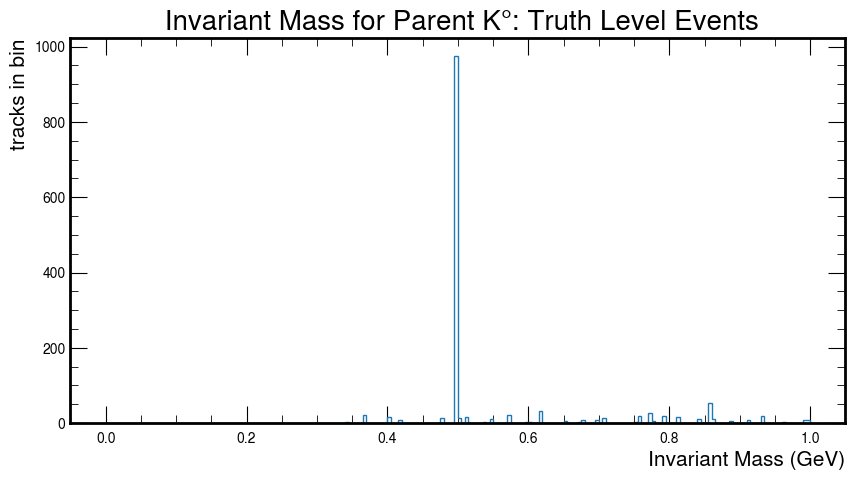

In [361]:
plt.figure(figsize = (10,5))
plt.hist(invariant_mass_reconstructed,bins=200,range=(0,1),histtype='step')
plt.ylabel('tracks in bin',fontsize = 15)
plt.xlabel('Invariant Mass (GeV)',fontsize = 15)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10)
plt.title(" Invariant Mass for Parent K\u00b0: Truth Level Events",fontsize = 20)

plt.show
plt.savefig('K_short_invariant_mass_truth_zoomed_0-1.png')

<function matplotlib.pyplot.show(close=None, block=None)>

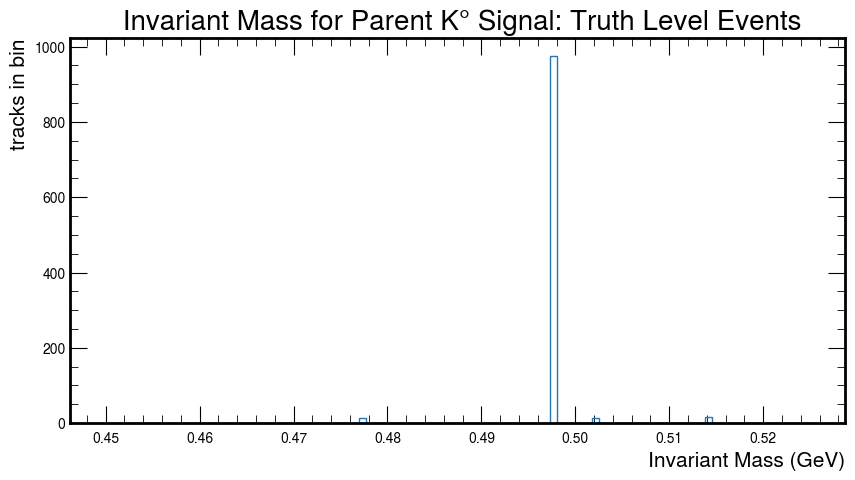

In [180]:
plt.figure(figsize = (10,5))
plt.hist(invariant_mass_reconstructed,bins=100,range=(0.45,0.525),histtype='step')
plt.ylabel('tracks in bin',fontsize = 15)
plt.xlabel('Invariant Mass (GeV)',fontsize = 15)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10)
plt.title(" Invariant Mass for Parent K\u00b0 Signal: Truth Level Events",fontsize = 20)

plt.show

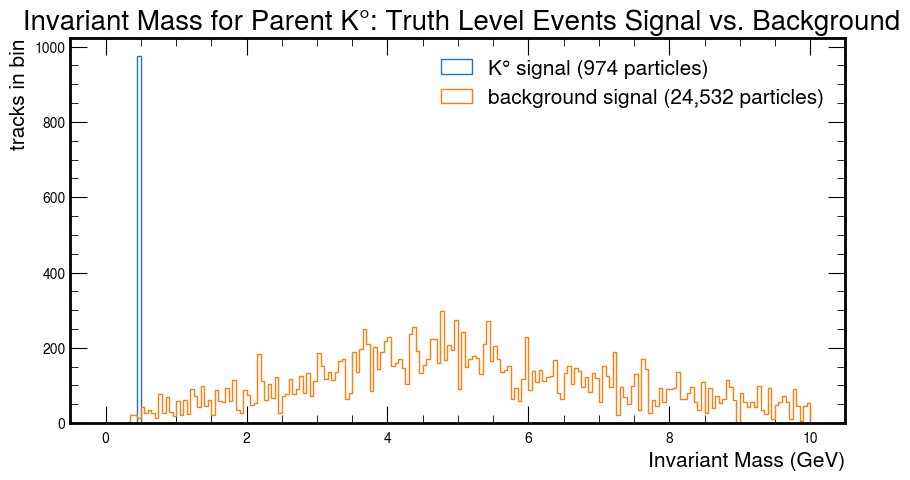

In [320]:
plt.figure(figsize = (10,5))
plt.hist(K_truth,bins=200,range=(0,10),histtype='step',label = 'K\u00b0 signal (974 particles)')
plt.hist(K_truth_background,bins=200,range=(0,10),histtype='step',label = 'background signal (24,532 particles)')
plt.ylabel('tracks in bin',fontsize = 15)
plt.xlabel('Invariant Mass (GeV)',fontsize = 15)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10)
plt.title(" Invariant Mass for Parent K\u00b0: Truth Level Events Signal vs. Background",fontsize = 20)
plt.legend(loc='upper right',prop={'size': 15})

plt.show
plt.savefig('K_short_invariant_mass_truth_signal_background_zoomed.png')

In [299]:
len(K_reco)

974

In [196]:
len(invariant_mass_reconstructed)

25506

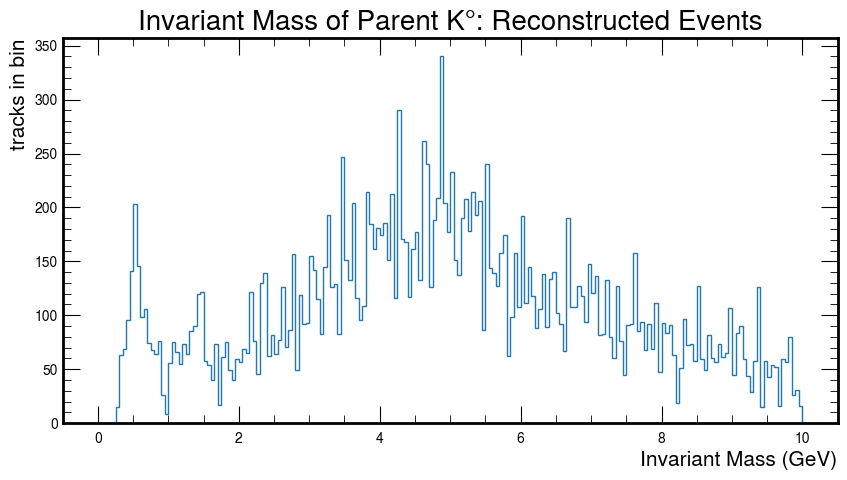

In [322]:
plt.figure(figsize = (10,5))
plt.hist(invariant_mass_truth,bins=200,range=(0,10),histtype='step')
plt.ylabel('tracks in bin',fontsize = 15)
plt.xlabel('Invariant Mass (GeV)',fontsize = 15)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10)
plt.title("Invariant Mass of Parent K\u00b0: Reconstructed Events",fontsize = 20)
# plt.legend(loc='best',prop={'size': 15})

plt.show
plt.savefig('K_short_invariant_mass_reconstructed_zoomed.png')

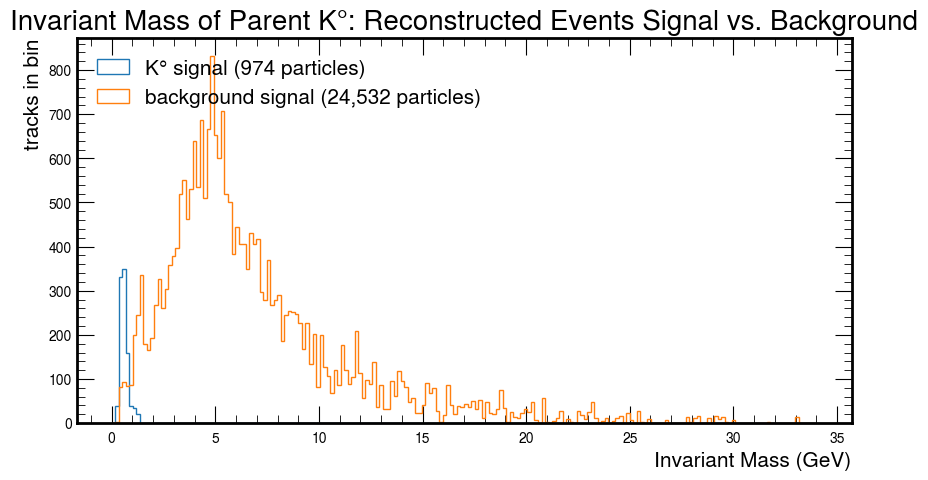

In [324]:
plt.figure(figsize = (10,5))
plt.hist(K_reco,bins=200,range=(0,34),histtype='step',label = 'K\u00b0 signal (974 particles)')
plt.hist(K_reco_background,bins=200,range=(0,34),histtype='step',label = 'background signal (24,532 particles)')
plt.ylabel('tracks in bin',fontsize = 15)
plt.xlabel('Invariant Mass (GeV)',fontsize = 15)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10)
plt.title("Invariant Mass of Parent K\u00b0: Reconstructed Events Signal vs. Background",fontsize = 20)
plt.legend(loc='upper left',prop={'size': 15})

plt.show
plt.savefig('K_short_invariant_mass_reconstructed_signal_background.png')

<function matplotlib.pyplot.show(close=None, block=None)>

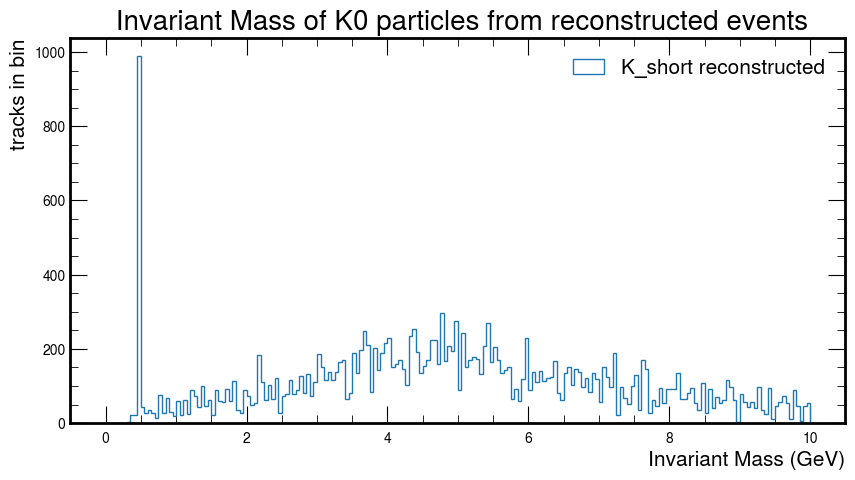

In [125]:
plt.figure(figsize = (10,5))
plt.hist(invariant_mass_reconstructed,bins=200,range=(0,10),histtype='step',label = 'K_short reconstructed')
plt.ylabel('tracks in bin',fontsize = 15)
plt.xlabel('Invariant Mass (GeV)',fontsize = 15)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10)
plt.title(" Invariant Mass of K0 particles from reconstructed events",fontsize = 20)
plt.legend(loc='best',prop={'size': 15})

plt.show

In [294]:
len(K_delta_eta)

974

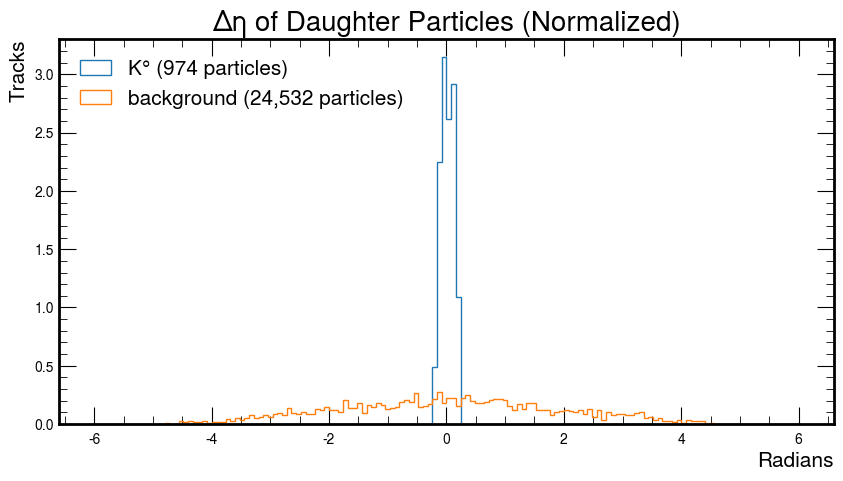

In [367]:
plt.figure(figsize = (10,5))
plt.hist(K_delta_eta,bins=150,range=(-6,6),histtype='step',label = 'K\u00b0 (974 particles)',density = True)
plt.hist(background_delta_eta,bins=150,range=(-6,6),histtype='step',label = 'background (24,532 particles)',density = True)
plt.ylabel('Tracks',fontsize = 15)
plt.xlabel('Radians',fontsize = 15)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10)
plt.title("\u0394\u03B7 of Daughter Particles (Normalized)",fontsize = 20)
plt.legend(loc='upper left',prop={'size': 15})

plt.show
plt.savefig('K_short_delta_eta.png')

In [326]:
len(background_delta_eta)

24532

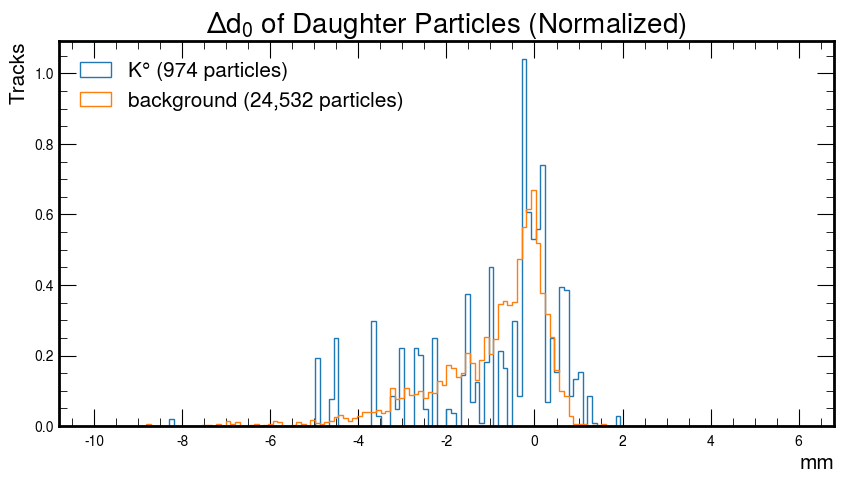

In [368]:
plt.figure(figsize = (10,5))
plt.hist(K_delta_d0,bins=150,range=(-10,6),histtype='step',label = 'K\u00b0 (974 particles)',density = True)
plt.hist(background_delta_d0,bins=150,range=(-10,6),histtype='step',label = 'background (24,532 particles)',density = True)
plt.ylabel('Tracks',fontsize = 15)
plt.xlabel('mm',fontsize = 15)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10)
plt.title("\u0394$d_{0}$ of Daughter Particles (Normalized)",fontsize = 20)
plt.legend(loc='upper left',prop={'size': 15})

plt.show
plt.savefig('K_short_delta_d0.png')

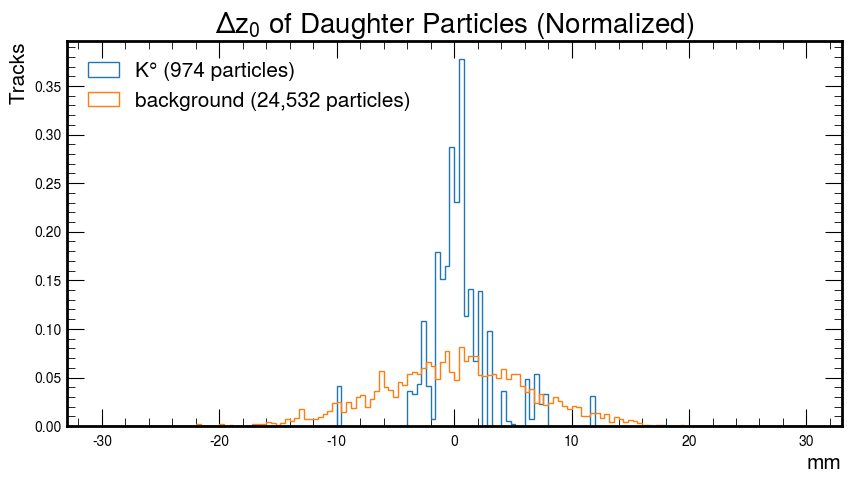

In [369]:
plt.figure(figsize = (10,5))
plt.hist(K_delta_z0,bins=150,range=(-30,30),histtype='step',label = 'K\u00b0 (974 particles)',density = True)
plt.hist(background_delta_z0,bins=150,range=(-30,30),histtype='step',label = 'background (24,532 particles)',density = True)
plt.ylabel('Tracks',fontsize = 15)
plt.xlabel('mm',fontsize = 15)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10)
plt.title("\u0394$z_{0}$ of Daughter Particles (Normalized)",fontsize = 20)
plt.legend(loc='upper left',prop={'size': 15})

plt.show
plt.savefig('K_short_delta_z0.png')

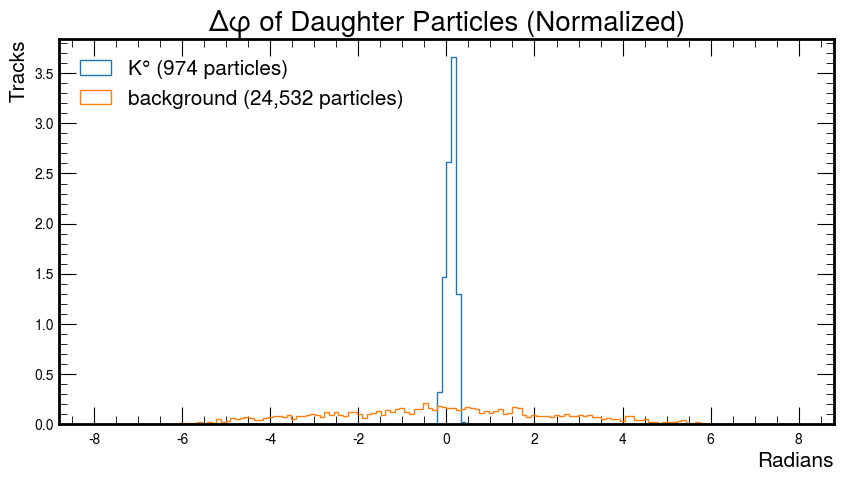

In [370]:
plt.figure(figsize = (10,5))
plt.hist(K_delta_phi,bins=150,range=(-8,8),histtype='step',label = 'K\u00b0 (974 particles)',density = True)
plt.hist(background_delta_phi,bins=150,range=(-8,8),histtype='step',label = 'background (24,532 particles)',density = True)
plt.ylabel('Tracks',fontsize = 15)
plt.xlabel('Radians',fontsize = 15)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10)
plt.title("\u0394\u03C6 of Daughter Particles (Normalized)",fontsize = 20)
plt.legend(loc='upper left',prop={'size': 15})

plt.show
plt.savefig('K_short_delta_phi.png')

<function matplotlib.pyplot.show(close=None, block=None)>

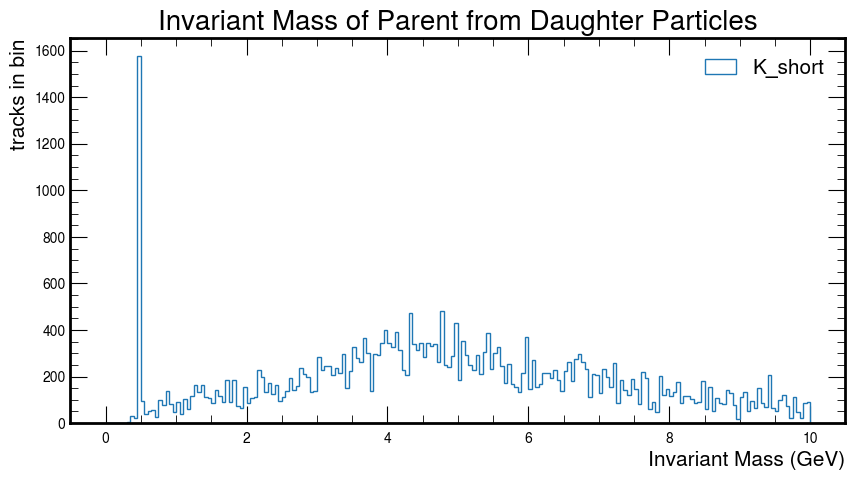

In [132]:
plt.figure(figsize = (10,5))
plt.hist(invariant_mass,bins=200,range=(0,10),histtype='step',label = 'K_short')
# plt.hist(k,bins=200,range=(0,10),histtype='step',label = 'K_short')
plt.ylabel('tracks in bin',fontsize = 15)
plt.xlabel('Invariant Mass (GeV)',fontsize = 15)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10)
plt.title("Invariant Mass of Parent from Daughter Particles",fontsize = 20)
plt.legend(loc='best',prop={'size': 15})

plt.show

In [359]:
# plt.figure(figsize = (10,5))
# plt.hist(t,bins=200,range=(0,10),histtype='step',label = 'K_short 1,542 particles')
# plt.hist(d,bins=200,range=(0,10),histtype='step',label = 'background 40,693 particles')
# plt.ylabel('tracks in bin',fontsize = 15)
# plt.xlabel('Invariant Mass (GeV)',fontsize = 15)
# plt.rc('xtick', labelsize=10) 
# plt.rc('ytick', labelsize=10)
# plt.title("Invariant Mass of Parent from Daughter Particles",fontsize = 20)
# plt.legend(loc='best',prop={'size': 15})

# plt.show

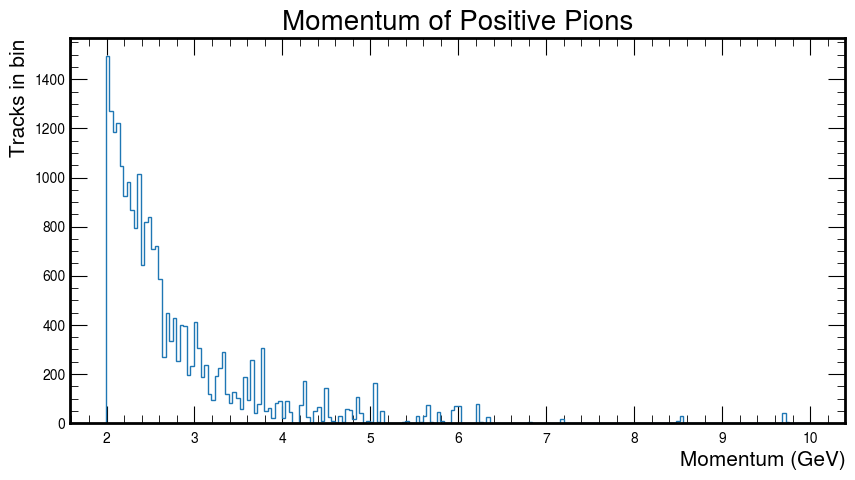

In [366]:
plt.figure(figsize = (10,5))
plt.hist(phi_pos_pt,bins=200,range=(1.99,10),histtype='step')
plt.ylabel('Tracks in bin',fontsize = 15)
plt.xlabel('Momentum (GeV)',fontsize = 15)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10)
plt.title("Momentum of Positive Pions",fontsize = 20)
# plt.legend(loc='best',prop={'size': 15})

plt.show
plt.savefig('pion_momentum_cut.png')

<function matplotlib.pyplot.show(close=None, block=None)>

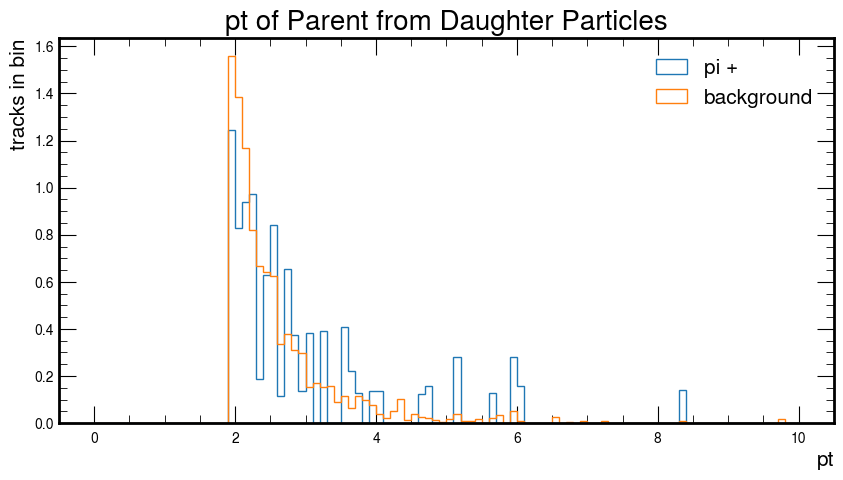

In [135]:
plt.figure(figsize = (10,5))
plt.hist(phi_pos_K_short,bins=100,range=(0,10),histtype='step',label = 'pi +',density=True)
plt.hist(phi_pos_background,bins=100,range=(0,10),histtype='step',label = 'background',density=True)
plt.ylabel('tracks in bin',fontsize = 15)
plt.xlabel('pt',fontsize = 15)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10)
plt.title("pt of Parent from Daughter Particles",fontsize = 20)
plt.legend(loc='best',prop={'size': 15})

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

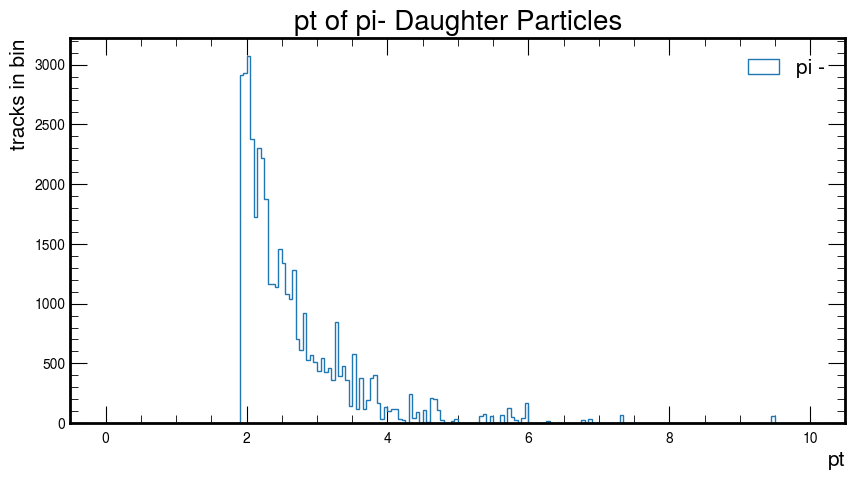

In [136]:
plt.figure(figsize = (10,5))
plt.hist(phi_neg_pt,bins=200,range=(0,10),histtype='step',label = 'pi -')
plt.ylabel('tracks in bin',fontsize = 15)
plt.xlabel('pt',fontsize = 15)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10)
plt.title("pt of pi- Daughter Particles",fontsize = 20)
plt.legend(loc='best',prop={'size': 15})

plt.show

In [137]:
number_of_phi_neg = []
for i in range(len(new_negative_phi)):
    number_of_phi_neg.append(len(new_negative_phi[i]))
    
number_of_phi_pos = []
for i in range(len(new_positive_phi)):
    number_of_phi_pos.append(len(new_positive_phi[i]))

In [138]:
len(new_positive_phi[0])

4

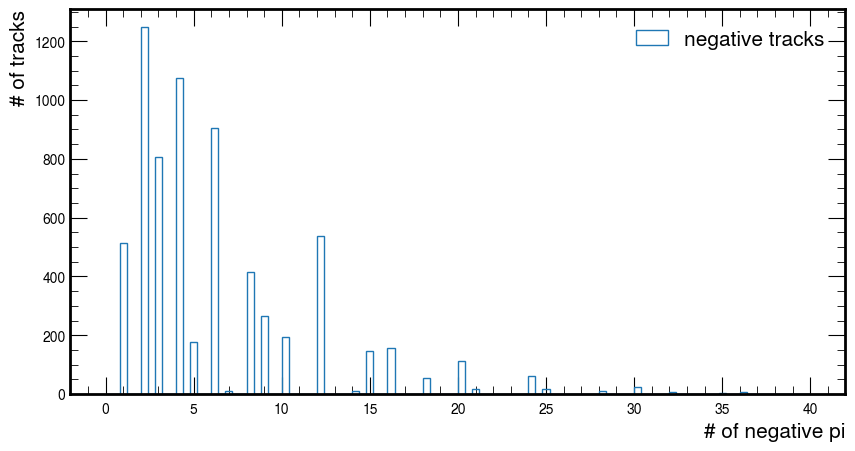

In [139]:
plt.figure(figsize = (10,5))
plt.hist(number_of_phi_neg,bins=100,range=(0,40),histtype='step',label='negative tracks')
plt.ylabel('# of tracks',fontsize = 15)
plt.xlabel('# of negative pi',fontsize = 15)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10)
plt.legend(loc='best',prop={'size': 15})
plt.show()

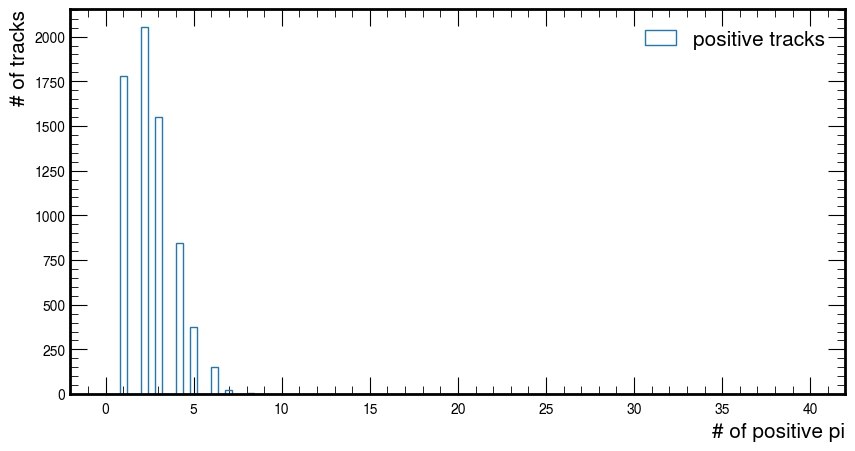

In [140]:
plt.figure(figsize = (10,5))
plt.hist(number_of_phi_pos,bins=100,range=(0,40),histtype='step',label='positive tracks')
plt.ylabel('# of tracks',fontsize = 15)
plt.xlabel('# of positive pi',fontsize = 15)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10)
plt.legend(loc='best',prop={'size': 15})
plt.show()

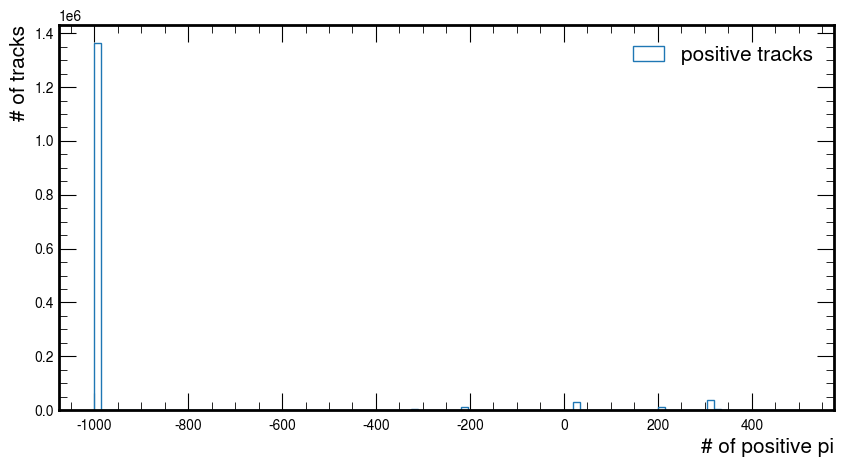

In [141]:
plt.figure(figsize = (10,5))
plt.hist(flatten(arrays1['parent_tp_pdgid']),bins=100,range=(-1000,500),histtype='step',label='positive tracks')
plt.ylabel('# of tracks',fontsize = 15)
plt.xlabel('# of positive pi',fontsize = 15)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10)
plt.legend(loc='best',prop={'size': 15})
plt.show()